<a href="https://colab.research.google.com/github/lmksoehd/ABC_boot_camp/blob/main/09_CIFAR_10_%EB%AC%BC%EC%B2%B4_%EC%A2%85%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_(0_9)_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09_CIFAR-10 물체 종류 이미지 (0-9) 분류하기

## 데이터 준비하기

In [37]:
from tensorflow.keras.datasets import cifar10

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 데이터 그리기

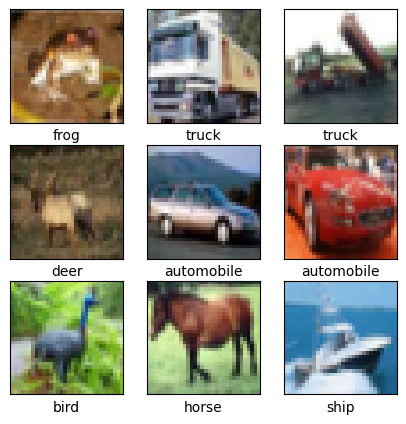

In [38]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

## 데이터 전처리

In [39]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [40]:
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

# 스케일링 (Standardization)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

# 실제 테스트 셋은 10000개

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [41]:
x_mean  # 3차원으로 나눠짐

array([125.30691805, 122.95039414, 113.86538318])

In [42]:
x_train[0]  # 범위 내로 변환 확인

array([[[ 0.67774091,  0.53229657,  0.40678596],
        [ 0.64599146,  0.50008459,  0.39179456],
        [ 0.66186619,  0.51619058,  0.42177737],
        ...,
        [ 0.88411233,  0.72556843,  0.6466484 ],
        [ 0.89998706,  0.74167441,  0.67663121],
        [ 0.96348595,  0.80609837,  0.73659682]],

       [[ 0.61424202,  0.53229657,  0.40678596],
        [ 0.59836729,  0.53229657,  0.37680316],
        [ 0.61424202,  0.53229657,  0.36181176],
        ...,
        [ 0.83648816,  0.64503848,  0.6166656 ],
        [ 0.83648816,  0.67725046,  0.6466484 ],
        [ 0.89998706,  0.74167441,  0.70661401]],

       [[ 0.42374532,  0.30681273,  0.12194931],
        [ 0.43962005,  0.32291872,  0.07697511],
        [ 0.48724422,  0.38734267,  0.0619837 ],
        ...,
        [ 0.75711454,  0.56450854,  0.52671718],
        [ 0.74123981,  0.61282651,  0.49673438],
        [ 0.82061343,  0.67725046,  0.55669999]],

       ...,

       [[-0.70336012, -0.69175855, -0.50768959],
        [-0

##  CIFAR-10 분류를 위한 cnn 모델 구성




In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam

In [44]:
model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

In [45]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [46]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


## 모델 설정하기

In [47]:
model.compile(optimizer = Adam(1e-4),  # 객체를 통체로 가져와서 러닝메이트를 줌(not use ''). -> 조금 더 천천히 학습했으면 좋겠다.
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우-> 굳이 범주형으로 만들지 않아도 된다.)
             metrics = ['acc'])

## 모델 학습하기

In [48]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 9s 7ms/step - loss: 2.1141 - acc: 0.2060 - val_loss: 1.9083 - val_acc: 0.2435
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.8093 - acc: 0.2756 - val_loss: 1.7050 - val_acc: 0.3206
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.6295 - acc: 0.3558 - val_loss: 1.5372 - val_acc: 0.3920
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.4667 - acc: 0.4179 - val_loss: 1.4143 - val_acc: 0.4459
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.3435 - acc: 0.4701 - val_loss: 1.3222 - val_acc: 0.4796
Epoch 6/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2457 - acc: 0.5134 - val_loss: 1.2730 - val_acc: 0.5084
Epoch 7/30
1094/1094 [==============================] - 8s 8ms/step - loss: 1.1617 - acc: 0.5553 - val_loss: 1.2268 - val_acc: 0.5331
Epoch 8/30
1094/1094 [==============================] - 7s 6ms

## 학습 결과 분석

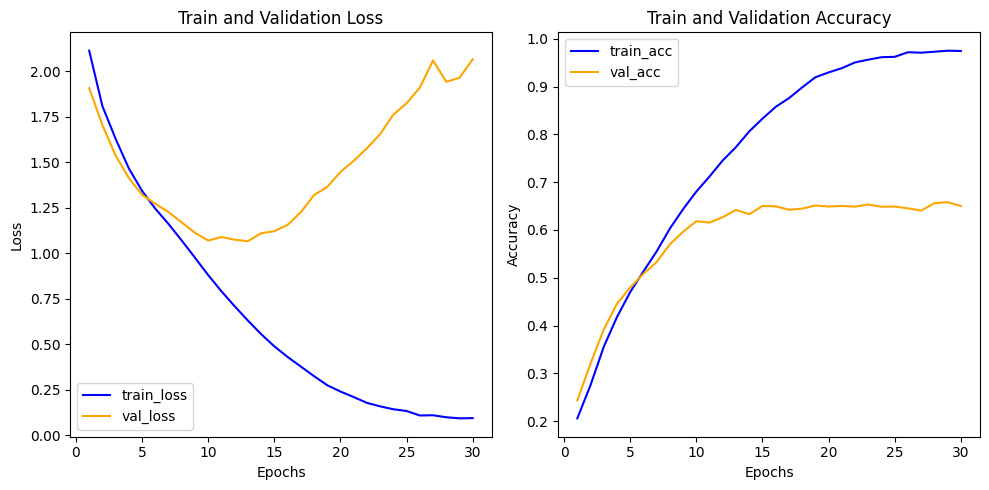

In [49]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

acc = his_dict['acc']  # 혹은 'acc'를 사용
val_acc = his_dict['val_acc']  # 혹은 'val_acc'를 사용

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

##  모델 평가하기

In [50]:
 model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.1179 - acc: 0.6448


[2.117896795272827, 0.6448000073432922]

## 모델 학습 결과

*   학습 15 이후 과대적합
*   과적 피하고, 정확도 높히기
*   과적 피하는 방법 -> 규제 /dfopout/배치정규화




## 모델 수정하기(dropout-> 가장 효과적인 과적 방지법)

## 드롭아웃 추가한 cnn 모델

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [52]:
model = Sequential()

# (32, 32, 3)의 데이터를 입력으로 받습니다.

# 입력(추출) - 추출 - 다운 사이징
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
# 0.2 만큼 드롭아웃 시켜

# 추출 - 추출 - 다운 사이징
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

# 추출 - 추출 - 다운 사이징
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

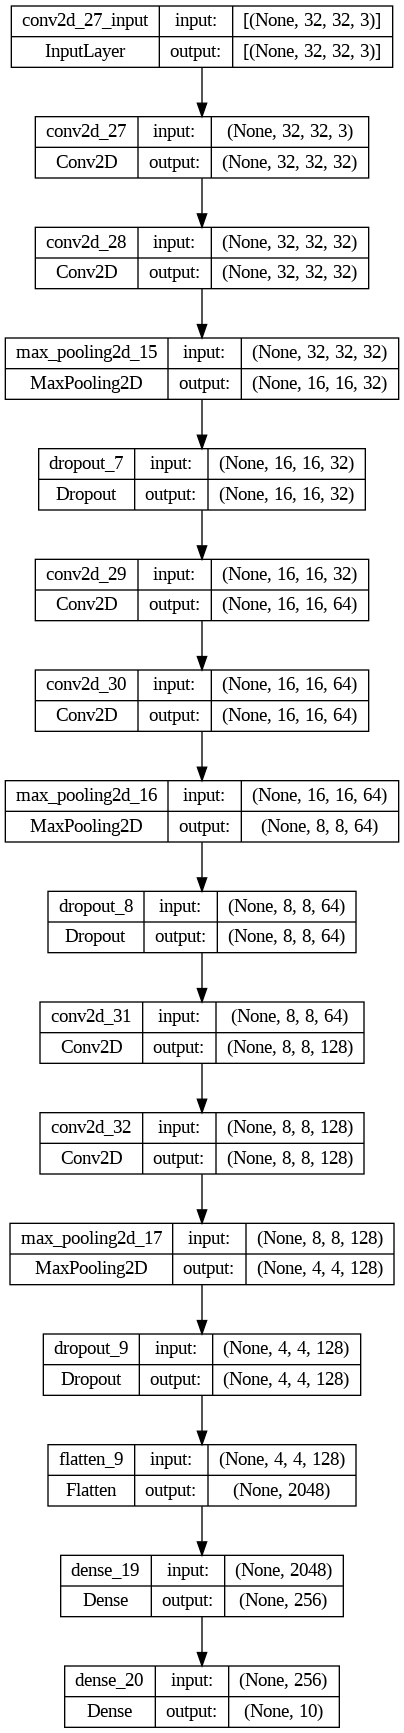

In [53]:
from keras.utils import plot_model

plot_model(model, 'model.png' ,show_shapes=True)

## 모델 설정/학습하기

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))  # 입력 데이터의 형태에 맞게 수정
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 64)                196672    
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer = Adam(1e-4), # 디폴트는 0.01, 설정은 0.0001 조금 더 느리게 학습해라 !
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우) # [0,0,0,0,0,0,0,0,1,0] 형태가 아닐 때 사용
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.9097 - acc: 0.3333 - val_loss: 1.7340 - val_acc: 0.3954
Epoch 2/30
1094/1094 [==============================] - 4s 3ms/step - loss: 1.6584 - acc: 0.4228 - val_loss: 1.6615 - val_acc: 0.4231
Epoch 3/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.5638 - acc: 0.4572 - val_loss: 1.6275 - val_acc: 0.4367
Epoch 4/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5015 - acc: 0.4790 - val_loss: 1.5938 - val_acc: 0.4443
Epoch 5/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.4539 - acc: 0.4997 - val_loss: 1.5694 - val_acc: 0.4535
Epoch 6/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.4132 - acc: 0.5108 - val_loss: 1.5726 - val_acc: 0.4547
Epoch 7/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.3778 - acc: 0.5239 - val_loss: 1.5671 - val_acc: 0.4569
Epoch 8/30
1094/1094 [==============================] - 4s 4ms

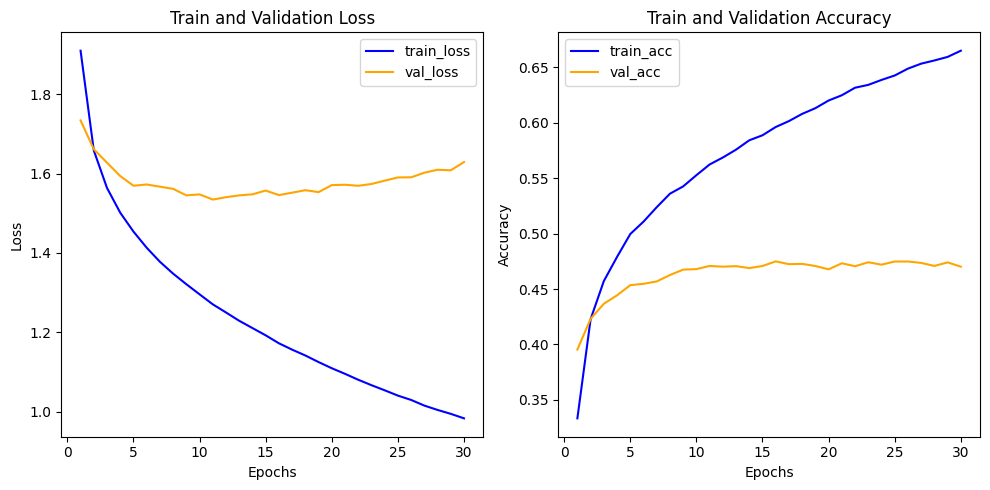

In [56]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

acc = his_dict['acc']  # 혹은 'acc'를 사용
val_acc = his_dict['val_acc']  # 혹은 'val_acc'를 사용

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6226 - acc: 0.4702


[1.6226283311843872, 0.4702000021934509]

## 최종모델 구성 및 학습


In [57]:
model.compile(optimizer = Adam(1e-4), # 디폴트는 0.01, 설정은 0.0001 조금 더 느리게 학습해라 !
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우) # [0,0,0,0,0,0,0,0,1,0] 형태가 아닐 때 사용
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9742 - acc: 0.6683 - val_loss: 1.6340 - val_acc: 0.4719
Epoch 2/15
1094/1094 [==============================] - 4s 4ms/step - loss: 0.9616 - acc: 0.6720 - val_loss: 1.6298 - val_acc: 0.4765
Epoch 3/15
1094/1094 [==============================] - 4s 4ms/step - loss: 0.9503 - acc: 0.6769 - val_loss: 1.6377 - val_acc: 0.4701
Epoch 4/15
1094/1094 [==============================] - 5s 4ms/step - loss: 0.9381 - acc: 0.6825 - val_loss: 1.6521 - val_acc: 0.4716
Epoch 5/15
1094/1094 [==============================] - 4s 4ms/step - loss: 0.9281 - acc: 0.6861 - val_loss: 1.6649 - val_acc: 0.4695
Epoch 6/15
1094/1094 [==============================] - 4s 4ms/step - loss: 0.9198 - acc: 0.6874 - val_loss: 1.6753 - val_acc: 0.4705
Epoch 7/15
1094/1094 [==============================] - 4s 4ms/step - loss: 0.9097 - acc: 0.6912 - val_loss: 1.6875 - val_acc: 0.4652
Epoch 8/15
1094/1094 [==============================] - 4s 4ms

In [58]:
model = Sequential()

# (32, 32, 3)의 데이터를 입력으로 받습니다.

# 입력(추출) - 추출 - 다운 사이징
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
# 0.2 만큼 드롭아웃 시켜

# 추출 - 추출 - 다운 사이징
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

# 추출 - 추출 - 다운 사이징
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

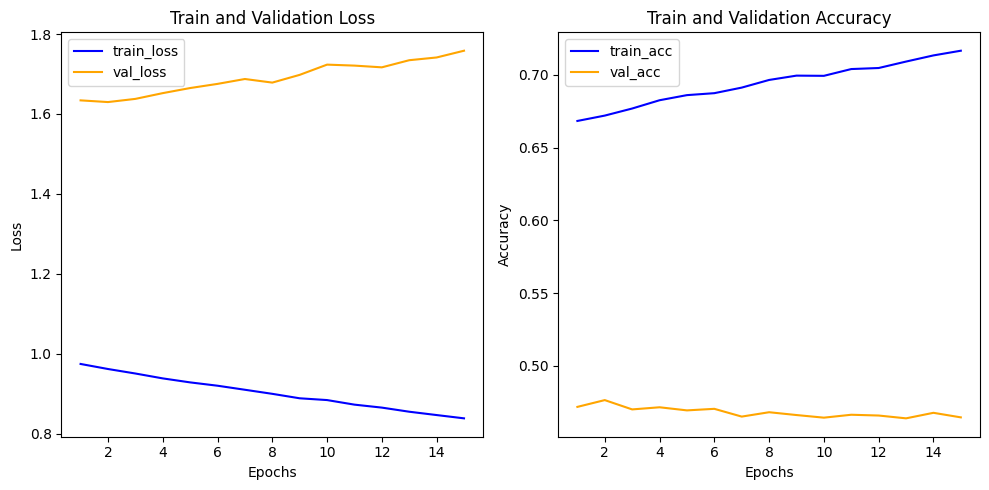

In [59]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

acc = his_dict['acc']  # 혹은 'acc'를 사용
val_acc = his_dict['val_acc']  # 혹은 'val_acc'를 사용

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [ ]:
# 뭔가 잘못되었다?

## 정확도가 높은 분류 모델 구성 - 전이학습

*   과대적합 피하고, 정확도는 높히기
*   https://wikidocs.net/164796
*   VGG16(visual geometry group) 을 활용한 분류 모델 구성
*   https://paperswithcode.com/dataset/imagenet




In [5]:
from keras.applications import VGG16
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

# 전이학습 모델 가져오기
pre_trained_vgg = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
pre_trained_vgg.summary()

# 분류모델 합치기
model = Sequential()
model.add(pre_trained_vgg)
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10개의 출력을 가지는 신경망

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
# 데이터 불러오기 예시 (실제로는 데이터 불러오는 방식에 따라 달라질 수 있습니다)
from keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [11]:
# 전이학습 모델 가져오기
pre_trained_vgg = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
pre_trained_vgg.summary()

# 분류모델 합치기
model = Sequential()
model.add(pre_trained_vgg)
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10개의 출력을 가지는 신경망

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

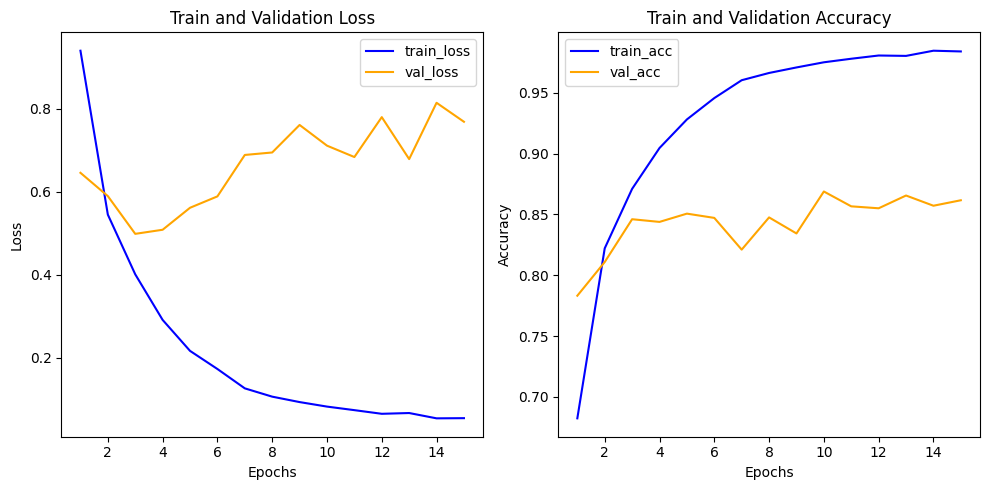

In [13]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

acc = his_dict['accuracy']  # 혹은 'acc'를 사용
val_acc = his_dict['val_accuracy']  # 혹은 'val_acc'를 사용

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [16]:
from keras.datasets import cifar10

(_, _), (x_test, y_test) = cifar10.load_data()

# 나머지 코드 (모델 평가)는 위에서 제공한 코드와 동일하게 사용할 수 있습니다
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.7681 - accuracy: 0.8617


[0.768115758895874, 0.8616999983787537]